In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from pandas.io.json import json_normalize
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
from sklearn.metrics import mean_squared_error
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Creating Functions and Testing Modeling on Pudgy Penguins NFT Collection

In [2]:
collections_we_have = ["cool cats", "meebits", "pudgy penguins"]
print("Hello future NFT flipper! Please let me know the collection you are interested in.")
collection = input("Enter name of Opensea collection: ").lower()
print(collection)

Hello future NFT flipper! Please let me know the collection you are interested in.
Enter name of Opensea collection: pudgy penguins
pudgy penguins


In [3]:
if collection in collections_we_have:
    print("Great, we can help predict prices for you today")

else:
    print("We cannot help you today, stay tuned for more NFT predictions")

Great, we can help predict prices for you today


In [4]:
if collection == "cool cats":
    df = pd.read_csv("coolcats_data.csv", index_col=0)
    
elif collection == "pudgy penguins":
    df = pd.read_csv("pudgy_data.csv", index_col=0)
    
else:
    print("Sorry, we will have more collections soon!")

In [5]:
df

,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address
created_date,,,,,,,,,,,,,,,
2021-11-30 04:55:10.583259,2245898989,1,1.1400,32451727.0,2473.0,6.0,Pudgy Penguin #2473,0x98b33d164e41d7a0a7eb6393d8e92d183f4a92bd,0xbc66ad48f303576f9287830714f57a3b974adfce78f2...,13712870,212307599,2021-11-30T04:54:42,0xa118f1d477e8e4915afeb4cf75d62d87dfbd37259c7b...,196,0x8b16008ce9cbea16c5152eb366cc35b478639af7
2021-11-30 04:51:55.670198,2245854433,1,2.5999,32458946.0,8726.0,5.0,Pudgy Penguin #8726,0x3d620bd5e05b3896081646e6cbedcbc9cb860d5f,0xee29688b98109e2f18943d58a6fa8f05c8c83b26d2fa...,13712847,212306027,2021-11-30T04:51:39,0xdbf25b08355444f2c8a75172661365e0978fc34ed4f4...,226,0x304a97c9a85c92c93ca24e0a85b69f892b67355e
2021-11-30 03:51:46.229835,2245023606,1,1.0990,32457972.0,7854.0,4.0,Pudgy Penguin #7854,0x9d81b6f001bd7e5fcd71713519aab5f27f2a8415,0x93ba725dd041e7d05a806a799c789ef15e0cb72dc28f...,13712597,212275246,2021-11-30T03:50:42,0xa55da48394f41280b33080086e8e135b9bc16d9a521d...,409,0x78b15fef736f94a717a8e8d29380ef87b0824827
2021-11-30 03:48:55.066759,2244984457,1,1.1499,32459104.0,8778.0,5.0,Pudgy Penguin #8778,0x3d620bd5e05b3896081646e6cbedcbc9cb860d5f,0xed19134161eff1cb6c3326733eb5fb1e455c5a48ac69...,13712585,212274170,2021-11-30T03:48:25,0xc416a5c30b70dbc8b2234d5da85a5c29048353477611...,201,0x78b15fef736f94a717a8e8d29380ef87b0824827
2021-11-30 03:48:38.868786,2244980842,1,1.1000,32458746.0,8469.0,4.0,Pudgy Penguin #8469,0x7055d2b309057d3396f7d005c8e1d61269b993a0,0x8a493330f77554374bd5bcec4b8e917b57d866304791...,13712584,212274051,2021-11-30T03:48:22,0xbb9566b1d1b868b2d7e2fbd640133e0c53f0696c471a...,56,0x4ac92d9a71724ed484e5e3ed61b290e18d825400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24 06:17:21.650842,619139237,1,3.4000,32449454.0,629.0,1.0,Pudgy Penguin #629,0xb38bd68a6f0ba599808d65c7a9cf2a428105b680,0x8543082bb01e230eb43b266be894341142c27400d338...,13086357,152619323,2021-08-24T06:16:33,0xbeebb584e5d798c9a7a298946b091a03512a972b6cd4...,249,0x4f8c2d5397262653cd8956cb977a0ba3660210c7
2021-08-24 06:13:48.896476,619130758,1,3.0500,32453386.0,3875.0,7.0,Pudgy Penguin #3875,0x0e5d9b06291205dd02a28247c59cccb6517c36d8,0x1fedfba8f13d13df2c892a3be3909cac98e47193e43a...,13086344,152618212,2021-08-24T06:13:22,0x69fdc41d8c9e4b0457992a7377f638e6c6cbddbdb771...,27,0x561acd2d4ca85e07bde08006777f44a8bd016043
2021-08-24 06:13:00.189498,619128859,1,3.1890,32452776.0,3269.0,3.0,Pudgy Penguin #3269,0x6f5765b3bbde5f02df45f989badc5528e4bc66f7,0x4e026a6311da580deda33891bbe2b4d90e1424414a33...,13086339,152617985,2021-08-24T06:12:43,0xedf9513881b274fce2f69276d2568a17e9a07f69ae4b...,92,0xfc70c1f67f6826d8849c20b0ce1dea9ac39e0f38


In [6]:
def prepare_the_data(data):
    #ensure index is a datetime
    data.index = pd.to_datetime(data.index)
    #drop zero ETH transactions
    droplist = data[data["total_price_eth"] == 0.0]
    data.drop(droplist.index, inplace=True)
    ts = data["total_price_eth"].resample('4H').min()
    ready_ts = ts.bfill()
    return ready_ts

<AxesSubplot:xlabel='created_date'>

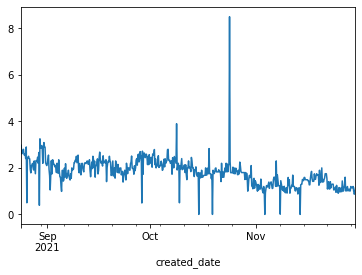

In [7]:
pudgy_ts = prepare_the_data(df)
pudgy_ts.plot()

In [8]:
def model_the_data(ts):
    model = ARIMA(ts, order=(0, 1, 1)).fit()
    predict = model.predict(typ="levels")
    
    rmse = np.sqrt(mean_squared_error(ts, predict))
    print(f"RMSE: {rmse}")
    
    fc = model.forecast(42, alpha=0.05) #one week of forecasted predictions = 42 observations
    floor_in_a_week = fc[41:].values
    print(f"Our model predicts the floor price will be {floor_in_a_week} in a week")
    print("If you spent less than that, we predict you can flip for a profit")
    return predict, fc

In [9]:
predictions, forecast = model_the_data(pudgy_ts)

RMSE: 0.4585645569310412
Our model predicts the floor price will be [1.06213189] in a week
If you spent less than that, we predict you can flip for a profit


In [10]:
import statsmodels.api as sm
from matplotlib.pylab import rcParams

<AxesSubplot:xlabel='created_date'>

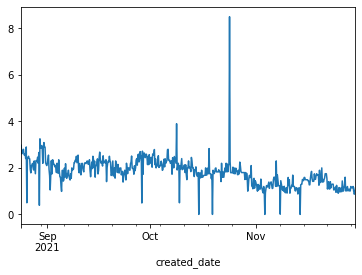

In [11]:
pudgy_ts.plot()

In [12]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p,d,q))

# Generate all different combinations of seasonal p, q and q triplets (use 12 for frequency)
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
pdqs

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [13]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(pudgy_ts,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =2429.4842332251164
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =1881.8528660728366
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1085.893263587715
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =845.5280218625128
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =1063.6318802192225
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =844.4425149174734
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =934.2524432439052
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =842.2806554245158
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =1918.3393540121717
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =1582.996962576518
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =1071.2629296450618
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =805.9713477800274
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =1046.0507082148963
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =806.0539455108594
ARIMA (0, 0, 1

C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =1175.3179180543589
ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =984.6377142816787
ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =711.3710412805742
ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =685.6165669188267
ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =1092.4303752504647
ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =705.107041468107
ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =686.4630934919098
ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =687.4339840112411
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =906.8645436958633
ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =701.4538234556253
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =993.1231671054952
ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =956.1665626536812
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1068.77249564946
ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =786.9880269184418
ARIMA (1, 0, 0) x (1

In [14]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (0, 1, 1)
pdqs    (0, 0, 1, 12)
aic           685.617
Name: 25, dtype: object

In [15]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(pudgy_ts, 
                                        order=(0, 1, 1), 
                                        seasonal_order=(0, 0, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8458      0.018    -46.684      0.000      -0.881      -0.810
ma.S.L12      -0.0027      0.073     -0.037      0.971      -0.146       0.140
sigma2         0.1911      0.002    103.399      0.000       0.187       0.195


In [20]:
pred = output.get_prediction(start=pd.to_datetime('2021-09-25'), dynamic=False)
pred_conf = pred.conf_int()

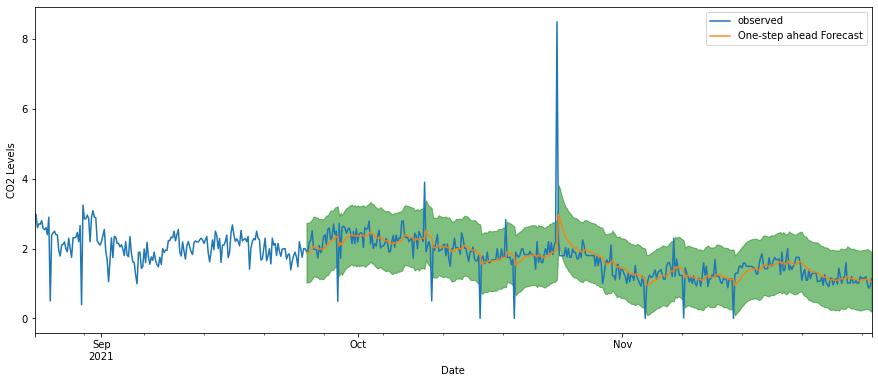

In [21]:
# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = pudgy_ts.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

plt.legend()

plt.show()

In [22]:
pred.predicted_mean

created_date
2021-09-25 00:00:00    1.881968
2021-09-25 04:00:00    1.889071
2021-09-25 08:00:00    1.890084
2021-09-25 12:00:00    1.934363
2021-09-25 16:00:00    1.981994
                         ...   
2021-11-29 12:00:00    1.118452
2021-11-29 16:00:00    1.131049
2021-11-29 20:00:00    1.110346
2021-11-30 00:00:00    1.073440
2021-11-30 04:00:00    1.049021
Freq: 4H, Name: predicted_mean, Length: 398, dtype: float64

The p value for the seasonal component was high, I manually changed this in my model to 36 instead of 12 to see the performance variation.

In [88]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(pudgy_ts, 
                                        order=(0, 1, 1), 
                                        seasonal_order=(0, 0, 1, 36), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1976      0.026    -45.768      0.000      -1.249      -1.146
ma.S.L36       0.0766      0.046      1.669      0.095      -0.013       0.167
sigma2         0.1289      0.007     19.720      0.000       0.116       0.142


In [89]:
pred = output.get_prediction(start=pd.to_datetime('2021-09-25'), dynamic=False)
pred_conf = pred.conf_int()

In [90]:
# Get the real and predicted values
forecasted = pred.predicted_mean
truth = pudgy_ts['2021-09-25':]

# Compute the mean square error
mse = ((forecasted - truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.22


In [56]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2021-11-25'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

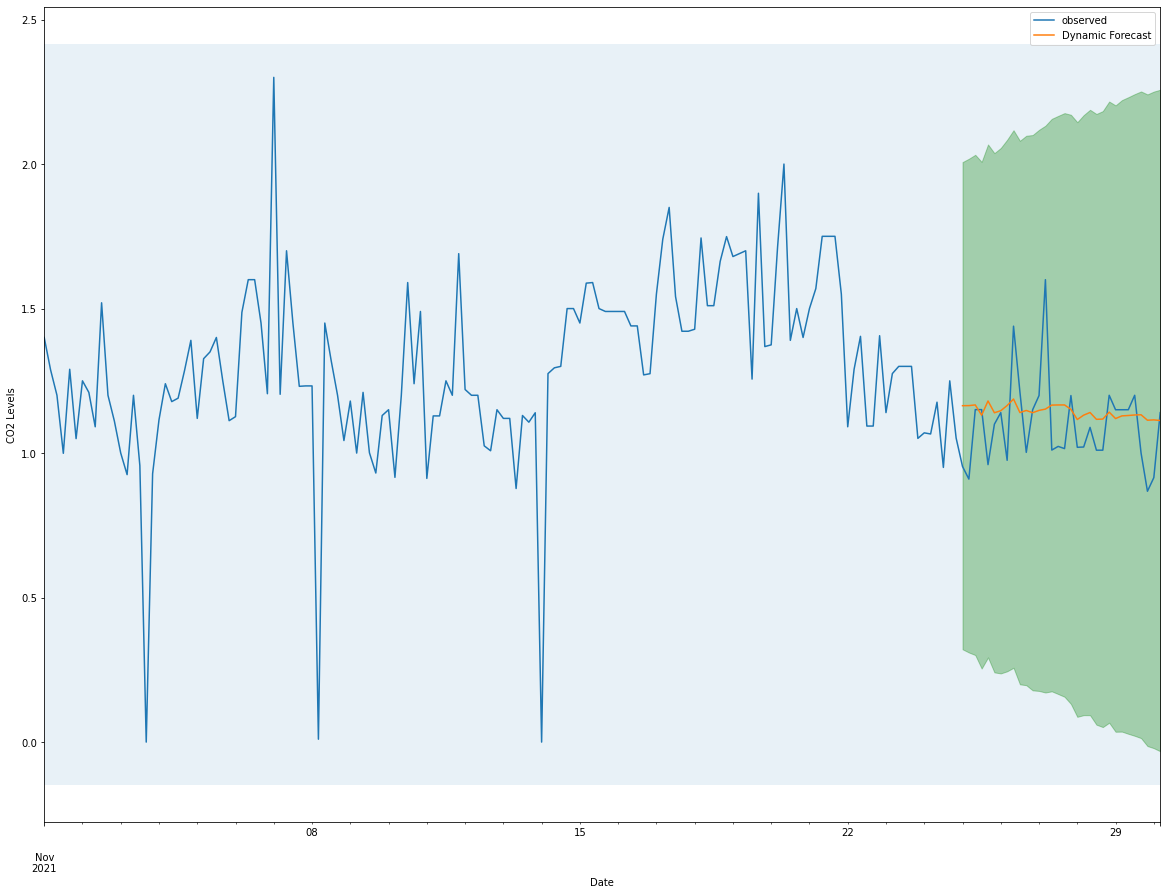

In [57]:
ax = pudgy_ts["2021-11-01":].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2021-01-01'), forecasted.index[-1], alpha=.1, zorder=-1)

plt.legend()
plt.show()

In [58]:
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

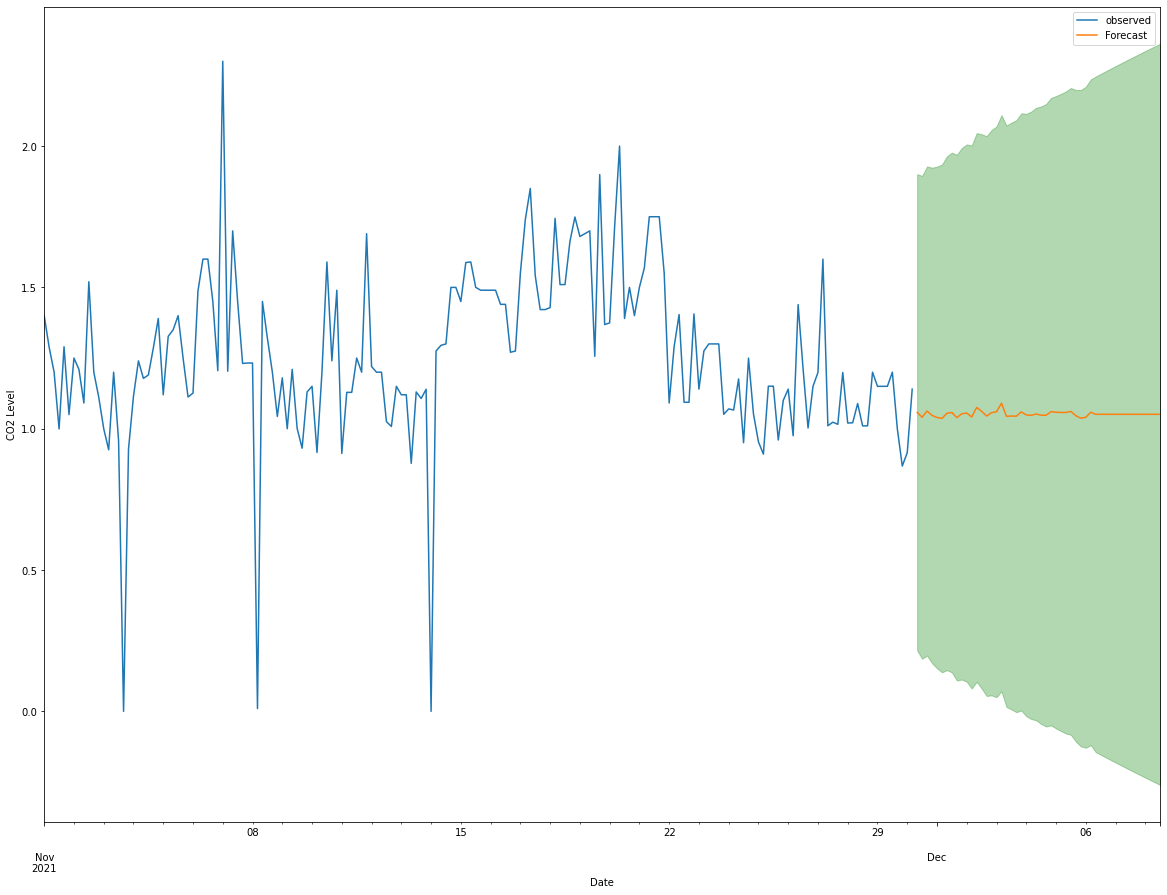

In [59]:
# Plot future predictions with confidence intervals
ax = pudgy_ts["2021-11-01":].plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.3)

plt.legend()
plt.show()

In [42]:
prediction.predicted_mean

2021-11-30 08:00:00    1.057905
2021-11-30 12:00:00    1.040527
2021-11-30 16:00:00    1.062579
2021-11-30 20:00:00    1.046980
2021-12-01 00:00:00    1.039792
2021-12-01 04:00:00    1.036429
2021-12-01 08:00:00    1.054669
2021-12-01 12:00:00    1.057399
2021-12-01 16:00:00    1.039026
2021-12-01 20:00:00    1.052880
2021-12-02 00:00:00    1.055405
2021-12-02 04:00:00    1.041388
2021-12-02 08:00:00    1.075231
2021-12-02 12:00:00    1.061423
2021-12-02 16:00:00    1.044806
2021-12-02 20:00:00    1.056704
2021-12-03 00:00:00    1.059844
2021-12-03 04:00:00    1.090241
2021-12-03 08:00:00    1.043983
2021-12-03 12:00:00    1.044922
2021-12-03 16:00:00    1.044335
2021-12-03 20:00:00    1.059570
2021-12-04 00:00:00    1.048547
2021-12-04 04:00:00    1.047463
2021-12-04 08:00:00    1.051965
2021-12-04 12:00:00    1.047728
2021-12-04 16:00:00    1.047664
2021-12-04 20:00:00    1.060384
2021-12-05 00:00:00    1.058250
2021-12-05 04:00:00    1.057543
2021-12-05 08:00:00    1.057446
2021-12-

In [44]:
pred_conf[10:20]

,lower total_price_eth,upper total_price_eth
2021-12-02 00:00:00,0.104828,2.005983
2021-12-02 04:00:00,0.080695,2.002081
2021-12-02 08:00:00,0.104528,2.045933
2021-12-02 12:00:00,0.080814,2.042033
2021-12-02 16:00:00,0.054388,2.035224
2021-12-02 20:00:00,0.056573,2.056834
2021-12-03 00:00:00,0.050095,2.069593
2021-12-03 04:00:00,0.070964,2.109518
2021-12-03 08:00:00,0.015266,2.072699
2021-12-03 12:00:00,0.006851,2.082993


In [74]:
#trying new model parameters - add time trend parameter
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(pudgy_ts, 
                                        order=(0, 1, 1), 
                                        seasonal_order=(0, 0, 1, 36), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False,
                                        trend="t")

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift      -2.166e-06   2.54e-05     -0.085      0.932    -5.2e-05    4.76e-05
ma.L1         -0.6958      0.017    -41.341      0.000      -0.729      -0.663
ma.S.L36       0.0494      0.067      0.732      0.464      -0.083       0.182
sigma2         0.2151      0.005     40.760      0.000       0.205       0.225


In [75]:
pred = output.get_prediction(start=pd.to_datetime('2021-09-25'), dynamic=False)
pred_conf = pred.conf_int()
# Get the real and predicted values
forecasted = pred.predicted_mean
truth = pudgy_ts['2021-09-25':]

# Compute the mean square error
mse = ((forecasted - truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.23


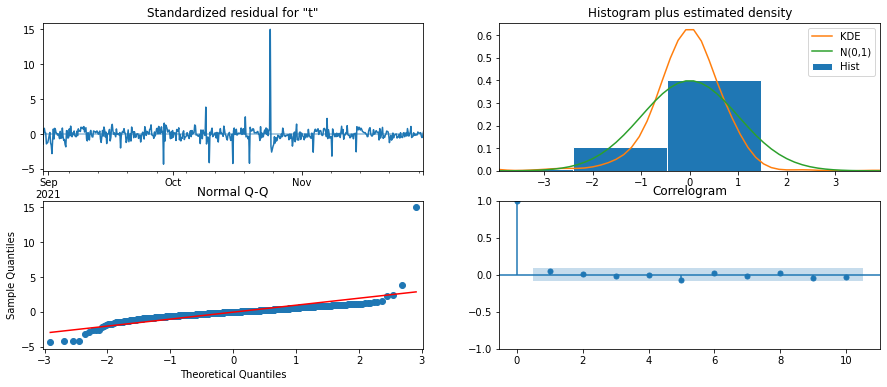

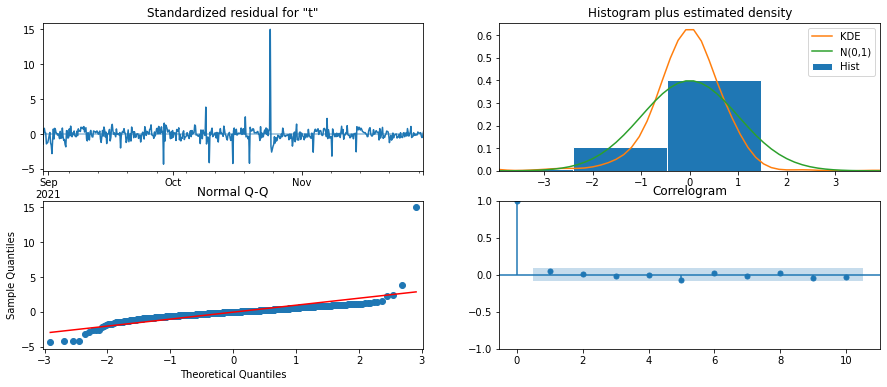

In [91]:
output.plot_diagnostics()

In [92]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p,d,q))

# Generate all different combinations of seasonal p, q and q triplets (use 12 for frequency)
pdqs = [(x[0], x[1], x[2], 36) for x in list(itertools.product(p, d, q))]
pdqs

[(0, 0, 0, 36),
 (0, 0, 1, 36),
 (0, 1, 0, 36),
 (0, 1, 1, 36),
 (1, 0, 0, 36),
 (1, 0, 1, 36),
 (1, 1, 0, 36),
 (1, 1, 1, 36)]

In [93]:
#running a new gridsearch using 36 as seasonal param
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(pudgy_ts,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue


ARIMA (0, 0, 0) x (0, 0, 0, 36)12 : AIC Calculated =2429.4842332251164
ARIMA (0, 0, 0) x (0, 0, 1, 36)12 : AIC Calculated =1829.4714501592046
ARIMA (0, 0, 0) x (0, 1, 0, 36)12 : AIC Calculated =1116.3840955881842
ARIMA (0, 0, 0) x (0, 1, 1, 36)12 : AIC Calculated =877.0159407655078


C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 0) x (1, 0, 0, 36)12 : AIC Calculated =1073.5611372796284
ARIMA (0, 0, 0) x (1, 0, 1, 36)12 : AIC Calculated =871.9018311262062
ARIMA (0, 0, 0) x (1, 1, 0, 36)12 : AIC Calculated =945.2893399161735
ARIMA (0, 0, 0) x (1, 1, 1, 36)12 : AIC Calculated =884.0791097964945
ARIMA (0, 0, 1) x (0, 0, 0, 36)12 : AIC Calculated =1918.3393540121717
ARIMA (0, 0, 1) x (0, 0, 1, 36)12 : AIC Calculated =1521.7459591847091
ARIMA (0, 0, 1) x (0, 1, 0, 36)12 : AIC Calculated =1078.7798096640277
ARIMA (0, 0, 1) x (0, 1, 1, 36)12 : AIC Calculated =821.2649786628391
ARIMA (0, 0, 1) x (1, 0, 0, 36)12 : AIC Calculated =1031.6948591026096
ARIMA (0, 0, 1) x (1, 0, 1, 36)12 : AIC Calculated =824.3787369026024
ARIMA (0, 0, 1) x (1, 1, 0, 36)12 : AIC Calculated =902.6412265887602
ARIMA (0, 0, 1) x (1, 1, 1, 36)12 : AIC Calculated =828.8694878744659
ARIMA (0, 1, 0) x (0, 0, 0, 36)12 : AIC Calculated =1004.6542430975986
ARIMA (0, 1, 0) x (0, 0, 1, 36)12 : AIC Calculated =901.7766687830292
ARIMA (0, 1, 0

C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 0) x (1, 1, 0, 36)12 : AIC Calculated =1076.5916179849532
ARIMA (0, 1, 0) x (1, 1, 1, 36)12 : AIC Calculated =925.8594607151019
ARIMA (0, 1, 1) x (0, 0, 0, 36)12 : AIC Calculated =711.3710412805742
ARIMA (0, 1, 1) x (0, 0, 1, 36)12 : AIC Calculated =639.341554041149
ARIMA (0, 1, 1) x (0, 1, 0, 36)12 : AIC Calculated =1009.3246854562755
ARIMA (0, 1, 1) x (0, 1, 1, 36)12 : AIC Calculated =666.7065106132002
ARIMA (0, 1, 1) x (1, 0, 0, 36)12 : AIC Calculated =640.7341789877007
ARIMA (0, 1, 1) x (1, 0, 1, 36)12 : AIC Calculated =641.3376295620265
ARIMA (0, 1, 1) x (1, 1, 0, 36)12 : AIC Calculated =813.0614519663352
ARIMA (0, 1, 1) x (1, 1, 1, 36)12 : AIC Calculated =668.675273250119
ARIMA (1, 0, 0) x (0, 0, 0, 36)12 : AIC Calculated =993.1231671054952
ARIMA (1, 0, 0) x (0, 0, 1, 36)12 : AIC Calculated =890.1145026821728
ARIMA (1, 0, 0) x (0, 1, 0, 36)12 : AIC Calculated =1062.549423655487
ARIMA (1, 0, 0) x (0, 1, 1, 36)12 : AIC Calculated =786.9004533292832
ARIMA (1, 0, 0) x (1

C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 1) x (0, 1, 0, 36)12 : AIC Calculated =1000.3267464309449
ARIMA (1, 0, 1) x (0, 1, 1, 36)12 : AIC Calculated =665.8281910908053
ARIMA (1, 0, 1) x (1, 0, 0, 36)12 : AIC Calculated =640.7452582111634
ARIMA (1, 0, 1) x (1, 0, 1, 36)12 : AIC Calculated =642.0253451304768
ARIMA (1, 0, 1) x (1, 1, 0, 36)12 : AIC Calculated =799.954008639005
ARIMA (1, 0, 1) x (1, 1, 1, 36)12 : AIC Calculated =665.8330532497439
ARIMA (1, 1, 0) x (0, 0, 0, 36)12 : AIC Calculated =846.1187719178873
ARIMA (1, 1, 0) x (0, 0, 1, 36)12 : AIC Calculated =764.3773068094977


C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 0) x (0, 1, 0, 36)12 : AIC Calculated =1145.0085288258588
ARIMA (1, 1, 0) x (0, 1, 1, 36)12 : AIC Calculated =792.0100488117519
ARIMA (1, 1, 0) x (1, 0, 0, 36)12 : AIC Calculated =764.380074441042
ARIMA (1, 1, 0) x (1, 0, 1, 36)12 : AIC Calculated =766.3311298153833
ARIMA (1, 1, 0) x (1, 1, 0, 36)12 : AIC Calculated =934.9229707018595
ARIMA (1, 1, 0) x (1, 1, 1, 36)12 : AIC Calculated =789.3808407276908
ARIMA (1, 1, 1) x (0, 0, 0, 36)12 : AIC Calculated =712.1612627287193
ARIMA (1, 1, 1) x (0, 0, 1, 36)12 : AIC Calculated =639.4205306537286
ARIMA (1, 1, 1) x (0, 1, 0, 36)12 : AIC Calculated =1011.2551252243288
ARIMA (1, 1, 1) x (0, 1, 1, 36)12 : AIC Calculated =668.237685510474
ARIMA (1, 1, 1) x (1, 0, 0, 36)12 : AIC Calculated =640.3966888301683
ARIMA (1, 1, 1) x (1, 0, 1, 36)12 : AIC Calculated =641.416526666548
ARIMA (1, 1, 1) x (1, 1, 0, 36)12 : AIC Calculated =812.4037859639632
ARIMA (1, 1, 1) x (1, 1, 1, 36)12 : AIC Calculated =670.2316792613778


In [96]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'] < 642]

,pdq,pdqs,aic
25,"(0, 1, 1)","(0, 0, 1, 36)",639.341554
28,"(0, 1, 1)","(1, 0, 0, 36)",640.734179
29,"(0, 1, 1)","(1, 0, 1, 36)",641.337630
41,"(1, 0, 1)","(0, 0, 1, 36)",640.025430
44,"(1, 0, 1)","(1, 0, 0, 36)",640.745258
57,"(1, 1, 1)","(0, 0, 1, 36)",639.420531
60,"(1, 1, 1)","(1, 0, 0, 36)",640.396689
61,"(1, 1, 1)","(1, 0, 1, 36)",641.416527


I have tried modeling all the parameters that received a AIC score in the mid-600s range and found that the model with
0,1,1
0,0,1,36
Has the lowest p values for the seasonality portion

In [99]:
#trying new model parameters - add time trend parameter
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(pudgy_ts, 
                                        order=(0, 1, 1), 
                                        seasonal_order=(0, 0, 1, 36), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False,
                                        )

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1976      0.026    -45.768      0.000      -1.249      -1.146
ma.S.L36       0.0766      0.046      1.669      0.095      -0.013       0.167
sigma2         0.1289      0.007     19.720      0.000       0.116       0.142
